<a href="https://colab.research.google.com/github/po04227/Deep-Learning/blob/master/YOLO_Colab_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# install
import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

PyTorch-YOLOv3	sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 14086 (delta 0), reused 1 (delta 0), pack-reused 14078
Receiving objects: 100% (14086/14086), 12.76 MiB | 17.70 MiB/s, done.
Resolving deltas: 100% (9577/9577), done.
/content/darknet
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B

In [11]:
# Compile and Configure
!make &> compile.log

In [12]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-29 07:12:32--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   309KB/s    in 8m 59s  

2020-07-29 07:21:33 (449 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [13]:
# Test An Image
def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [14]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
!ls

--2020-07-29 07:21:54--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg [following]
--2020-07-29 07:21:54--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68535 (67K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  66.93K  --.-KB/s    in 0.02s   

2020-07-29 07:21:54 (3.01 MB/s) - ‘test.jpg’ saved [68535/68535]

3rdparty	compile.log		include		       results
back

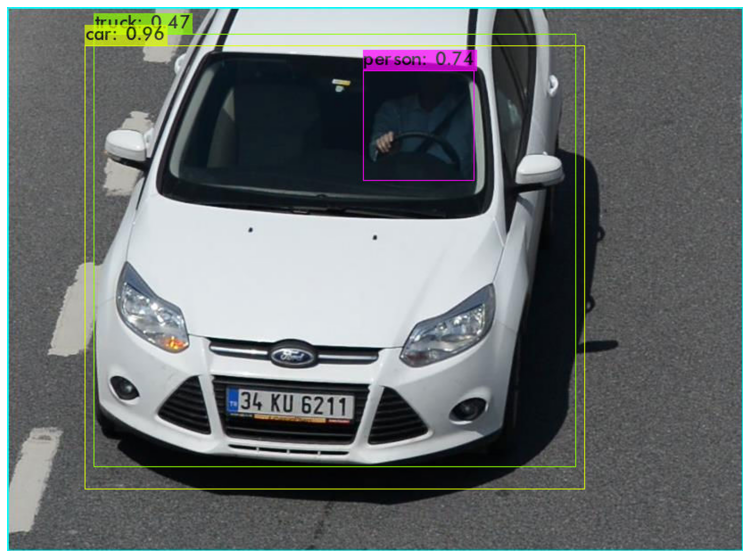

In [15]:
predictImage("test.jpg")

In [16]:
# Test with Video
def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))

In [17]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
!ls

--2020-07-29 07:27:31--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi [following]
--2020-07-29 07:27:31--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15897530 (15M) [application/octet-stream]
Saving to: ‘test.avi’

test.avi            100%[===================>]  15.16M  31.1MB/s    in 0.5s    

2020-07-29 07:27:32 (31.1 MB/s) - ‘test.avi’ saved [15897530/15897530]

3rdparty	darknet			LICENSE	

In [18]:
predictVideo("test.avi")

In [19]:
!du -h res.avi

93M	res.avi


In [20]:
from google.colab import files

files.download('/content/darknet/res.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>